## ESMA 3016
## Edgar Acuna
### Agosto 2019
### Lab 4. Histograma en Python usando cuatro librerias: ggplot, plotly, seaborn y Bokeh 

In [16]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import bokeh
import warnings
warnings.filterwarnings('ignore')

In [17]:
#llamando a plotnine
import plotnine

In [18]:
# Otra forma de llamar a plotnine
from plotnine import *

In [19]:
#Funcion magica para que la grafica de matplotlib salga en la pantalla
%matplotlib inline

In [20]:
#Leyendo los datos
datos1=pd.read_csv("http://academic.uprm.edu/eacuna/clase97.txt",sep=" ")

In [21]:
datos1.head()

,edad,sexo,escuela,programa,creditos,gpa,familia,hestud,htv
0,21,f,publ,biol,119,3.60,3,35,10
1,18,f,priv,mbio,15,3.60,3,30,10
2,19,f,priv,biot,73,3.61,5,5,7
3,20,f,priv,mbio,*,2.38,3,14,3
4,21,m,publ,pmed,114,3.15,2,25,25


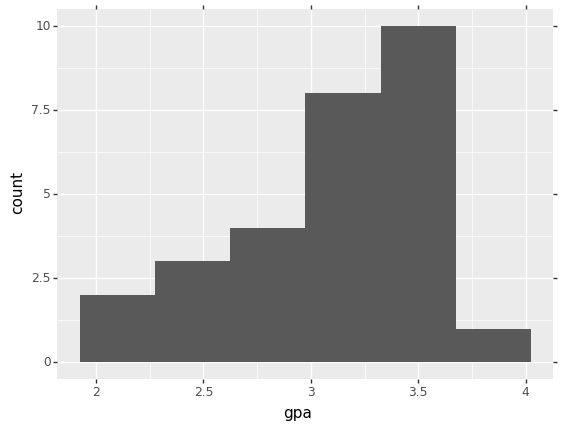

<ggplot: (-9223371888796108512)>

In [22]:
# Histograma de gpa usando ggplot
p=ggplot(aes(x='gpa'),data=datos1)
p+geom_histogram(binwidth=.35)

Notar que en lugar de 5 intervalos ggplot muestra 6 intervalos

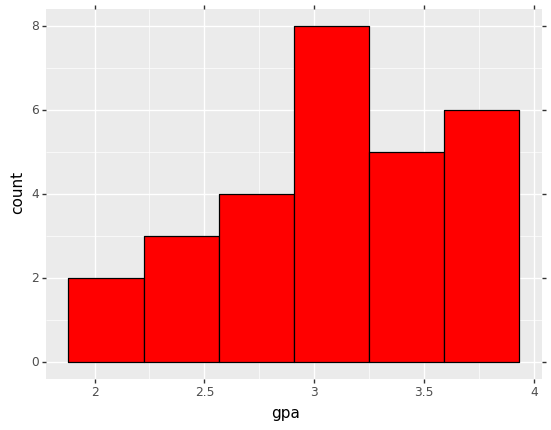

<ggplot: (148058496979)>

In [23]:
# Histograma de gpa con 6 intervalos usando ggplot
p=ggplot(aes(x = 'gpa'),data=datos1) 
p=p+geom_histogram(colour = "black" , fill = "red" , bins = 6)
p

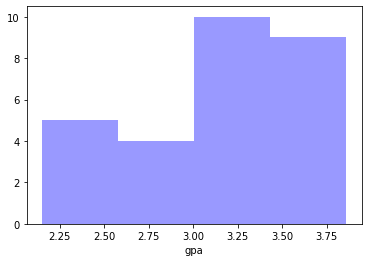

In [24]:
#Histogram de gpa usando seaborn
sns.distplot(datos1['gpa'],kde=False, color="blue")

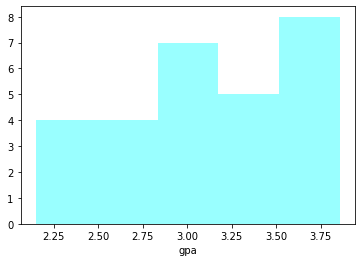

In [25]:
#otra vez el histograma en seaborn usando 5 intervalos
sns.distplot(datos1['gpa'],bins=5, kde=False, color="cyan")

In [26]:
#Histograma usando plotly
import plotly 
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

x = datos1['gpa']
data = [go.Histogram(x=x)]

plotly.offline.iplot(data, filename='histograma en plotly')

Comentario: Me da la impresion de que la libreria mas estable es seaborn.
Lo unico malo es que no hace pie charts

In [27]:
# haciendo un segundo ejemplo con el cojunto de datos millaje
cars=pd.read_table("http://academic.uprm.edu/eacuna/millaje.txt")
cars.head()

,mpg,sp,wt,vol,hp
0,65.4,96,17.5,89,49
1,56.0,97,20.0,92,55
2,55.9,97,20.0,92,55
3,49.0,105,20.0,92,70
4,46.5,96,20.0,92,53


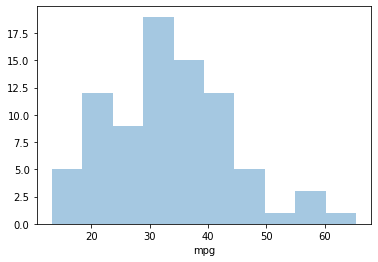

In [28]:
#Haciendo el histograma cpn seaborn
sns.distplot(cars['mpg'],kde=False)

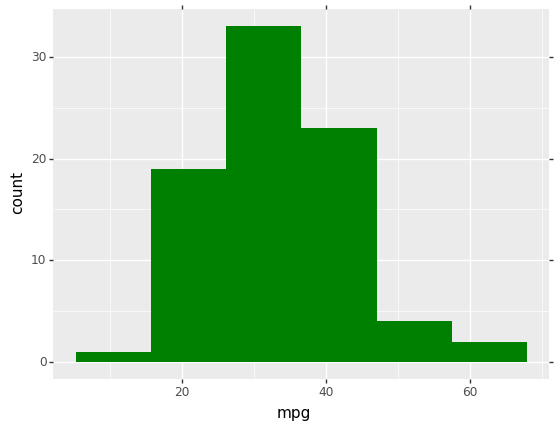

<ggplot: (148059115440)>

In [29]:
#Haciendo el histograma con ggplopt
p = ggplot(aes(x='mpg'), data=cars)
p+geom_histogram(fill="green",bins=6)

In [30]:
from bokeh.plotting import figure
from bokeh.io import show, output_notebook
arr_hist, edges = np.histogram(datos1['gpa'], bins = 6)
# Put the information in a dataframe
datos2 = pd.DataFrame({'gpa': arr_hist, 
                       'left': edges[:-1], 
                       'right': edges[1:]})
p = figure(plot_height = 600, plot_width = 600, 
           title = 'Histogram of gpa',
          x_axis_label = 'gpa', 
           y_axis_label = 'frecuencia absoluta')

# Add a quad glyph
p.quad(bottom=0, top=datos2['gpa'], 
       left=datos2['left'], right=datos2['right'], 
       fill_color='red', line_color='black')

# Show the plot
output_notebook()
show(p)

Loading BokehJS ...